In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

dataset = pd.read_csv('train.csv')
dataset.head()
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0:1].values

Text(0.5, 1.0, 'Frequency of Digits')

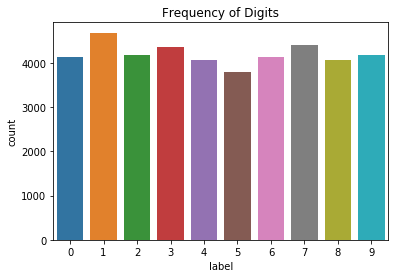

In [4]:
# Plotting the frequency of digits

sns.countplot(dataset['label'])
plt.title('Frequency of Digits')

In [5]:
# Rescaling the images

X = X/255

In [6]:
# Encoding the labels

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y).toarray()

In [7]:
# Reshaping the images

X = X.reshape(42000,28,28,1)

In [8]:
# Importing the libraries for our convolution neural network

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [14]:
# Adding the layers of our convolution neural network

classifier = Sequential()

classifier.add(Convolution2D(32,(3,3),input_shape = (28,28,1),activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(32,(3,3),activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units = 100,kernel_initializer = 'uniform',activation = 'relu'))

classifier.add(Dense(units = 100,kernel_initializer = 'uniform',activation = 'relu'))

classifier.add(Dense(units = 10,kernel_initializer = 'uniform',activation = 'softmax'))

classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
__________

In [16]:
# Fitting the data to our CNN with 20 epochs and using 20% of the data for validation

classifier.fit(X,y,epochs = 20,validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 8s 235us/step - loss: 0.0072 - acc: 0.9979 - val_loss: 0.0638 - val_acc: 0.9882
Epoch 2/20
33600/33600 [==============================] - 8s 236us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0783 - val_acc: 0.9856
Epoch 3/20
33600/33600 [==============================] - 8s 239us/step - loss: 0.0048 - acc: 0.9985 - val_loss: 0.0658 - val_acc: 0.9877
Epoch 4/20
33600/33600 [==============================] - 8s 240us/step - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0652 - val_acc: 0.9887
Epoch 5/20
33600/33600 [==============================] - 9s 262us/step - loss: 0.0038 - acc: 0.9988 - val_loss: 0.0572 - val_acc: 0.9904
Epoch 6/20
33600/33600 [==============================] - 8s 239us/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.0757 - val_acc: 0.9874
Epoch 7/20
33600/33600 [==============================] - 8s 241us/step - loss: 0.0037 - acc: 0.9989 - val_loss: 0.0600 - v

In [24]:
y_pred = classifier.predict(X)

After 20 epochs , our CNN model gives us 99.93% accuracy on the training set and an accuracy of 98.83% on the validation set.